In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv("data/ready/all_indices.csv",sep=";")

#### Correlations

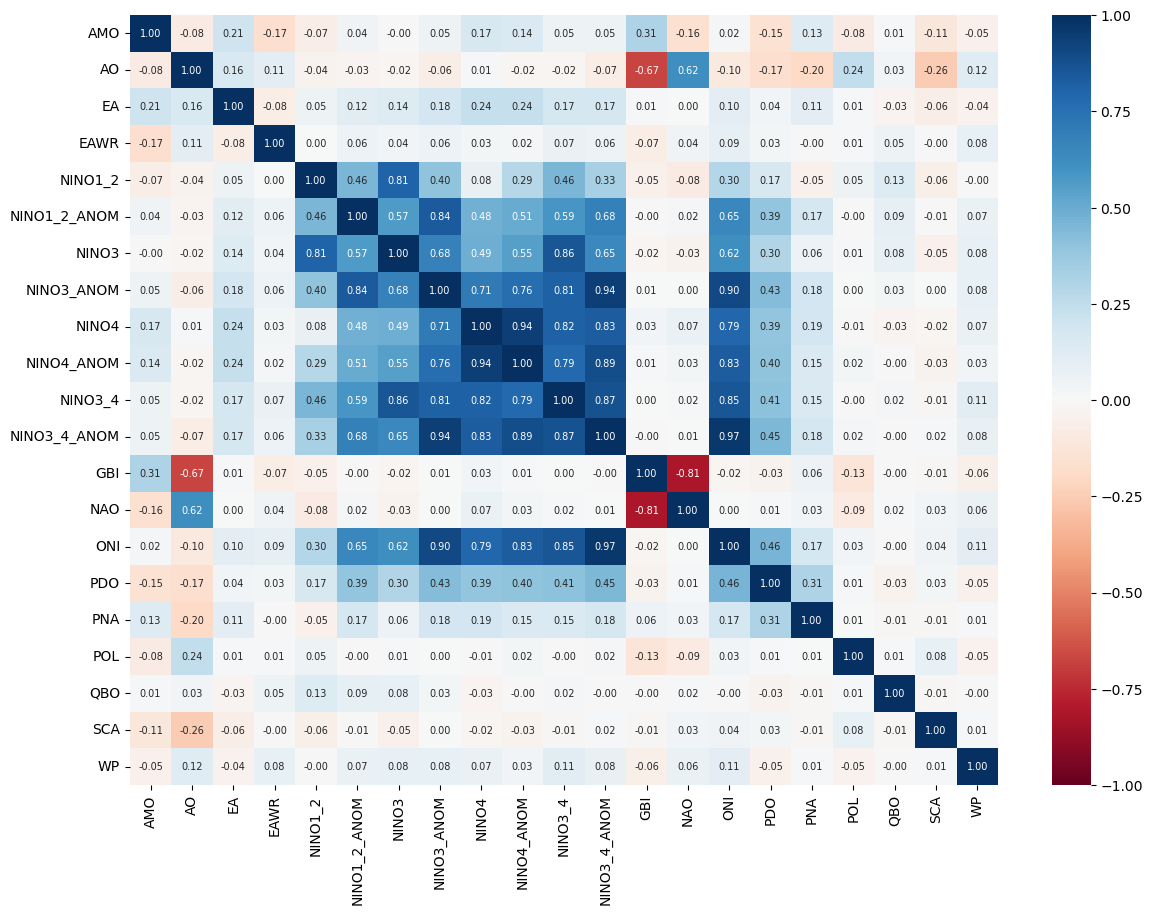

In [120]:
corr_matrix = df.drop(columns=["year","month"]).corr()
#mask= np.zeros_like(corr_matrix)
#mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,
            vmax=1, vmin=-1,
            annot=True, fmt=".2f",annot_kws={'fontsize':7},
            #mask=mask,
            cmap="RdBu")
plt.show()

In [101]:
indices = df.drop(columns=["year","month"]).columns
np.shape(indices)

(21,)

In [99]:
df['AMO'].shift(1)

0        NaN
1      0.105
2     -0.040
3     -0.112
4     -0.137
       ...  
872    0.358
873    0.662
874    0.483
875    0.282
876    0.218
Name: AMO, Length: 877, dtype: float64

In [100]:
df.drop(columns=["year","month"]).corr()["AMO"]

AMO             1.000000
AO             -0.083741
EA              0.207831
EAWR           -0.170170
NINO1_2        -0.067767
NINO1_2_ANOM    0.041630
NINO3          -0.003944
NINO3_ANOM      0.049250
NINO4           0.168085
NINO4_ANOM      0.141716
NINO3_4         0.049728
NINO3_4_ANOM    0.050638
GBI             0.312194
NAO            -0.162473
ONI             0.016099
PDO            -0.149719
PNA             0.131202
POL            -0.083593
QBO             0.013966
SCA            -0.111017
WP             -0.048150
Name: AMO, dtype: float64

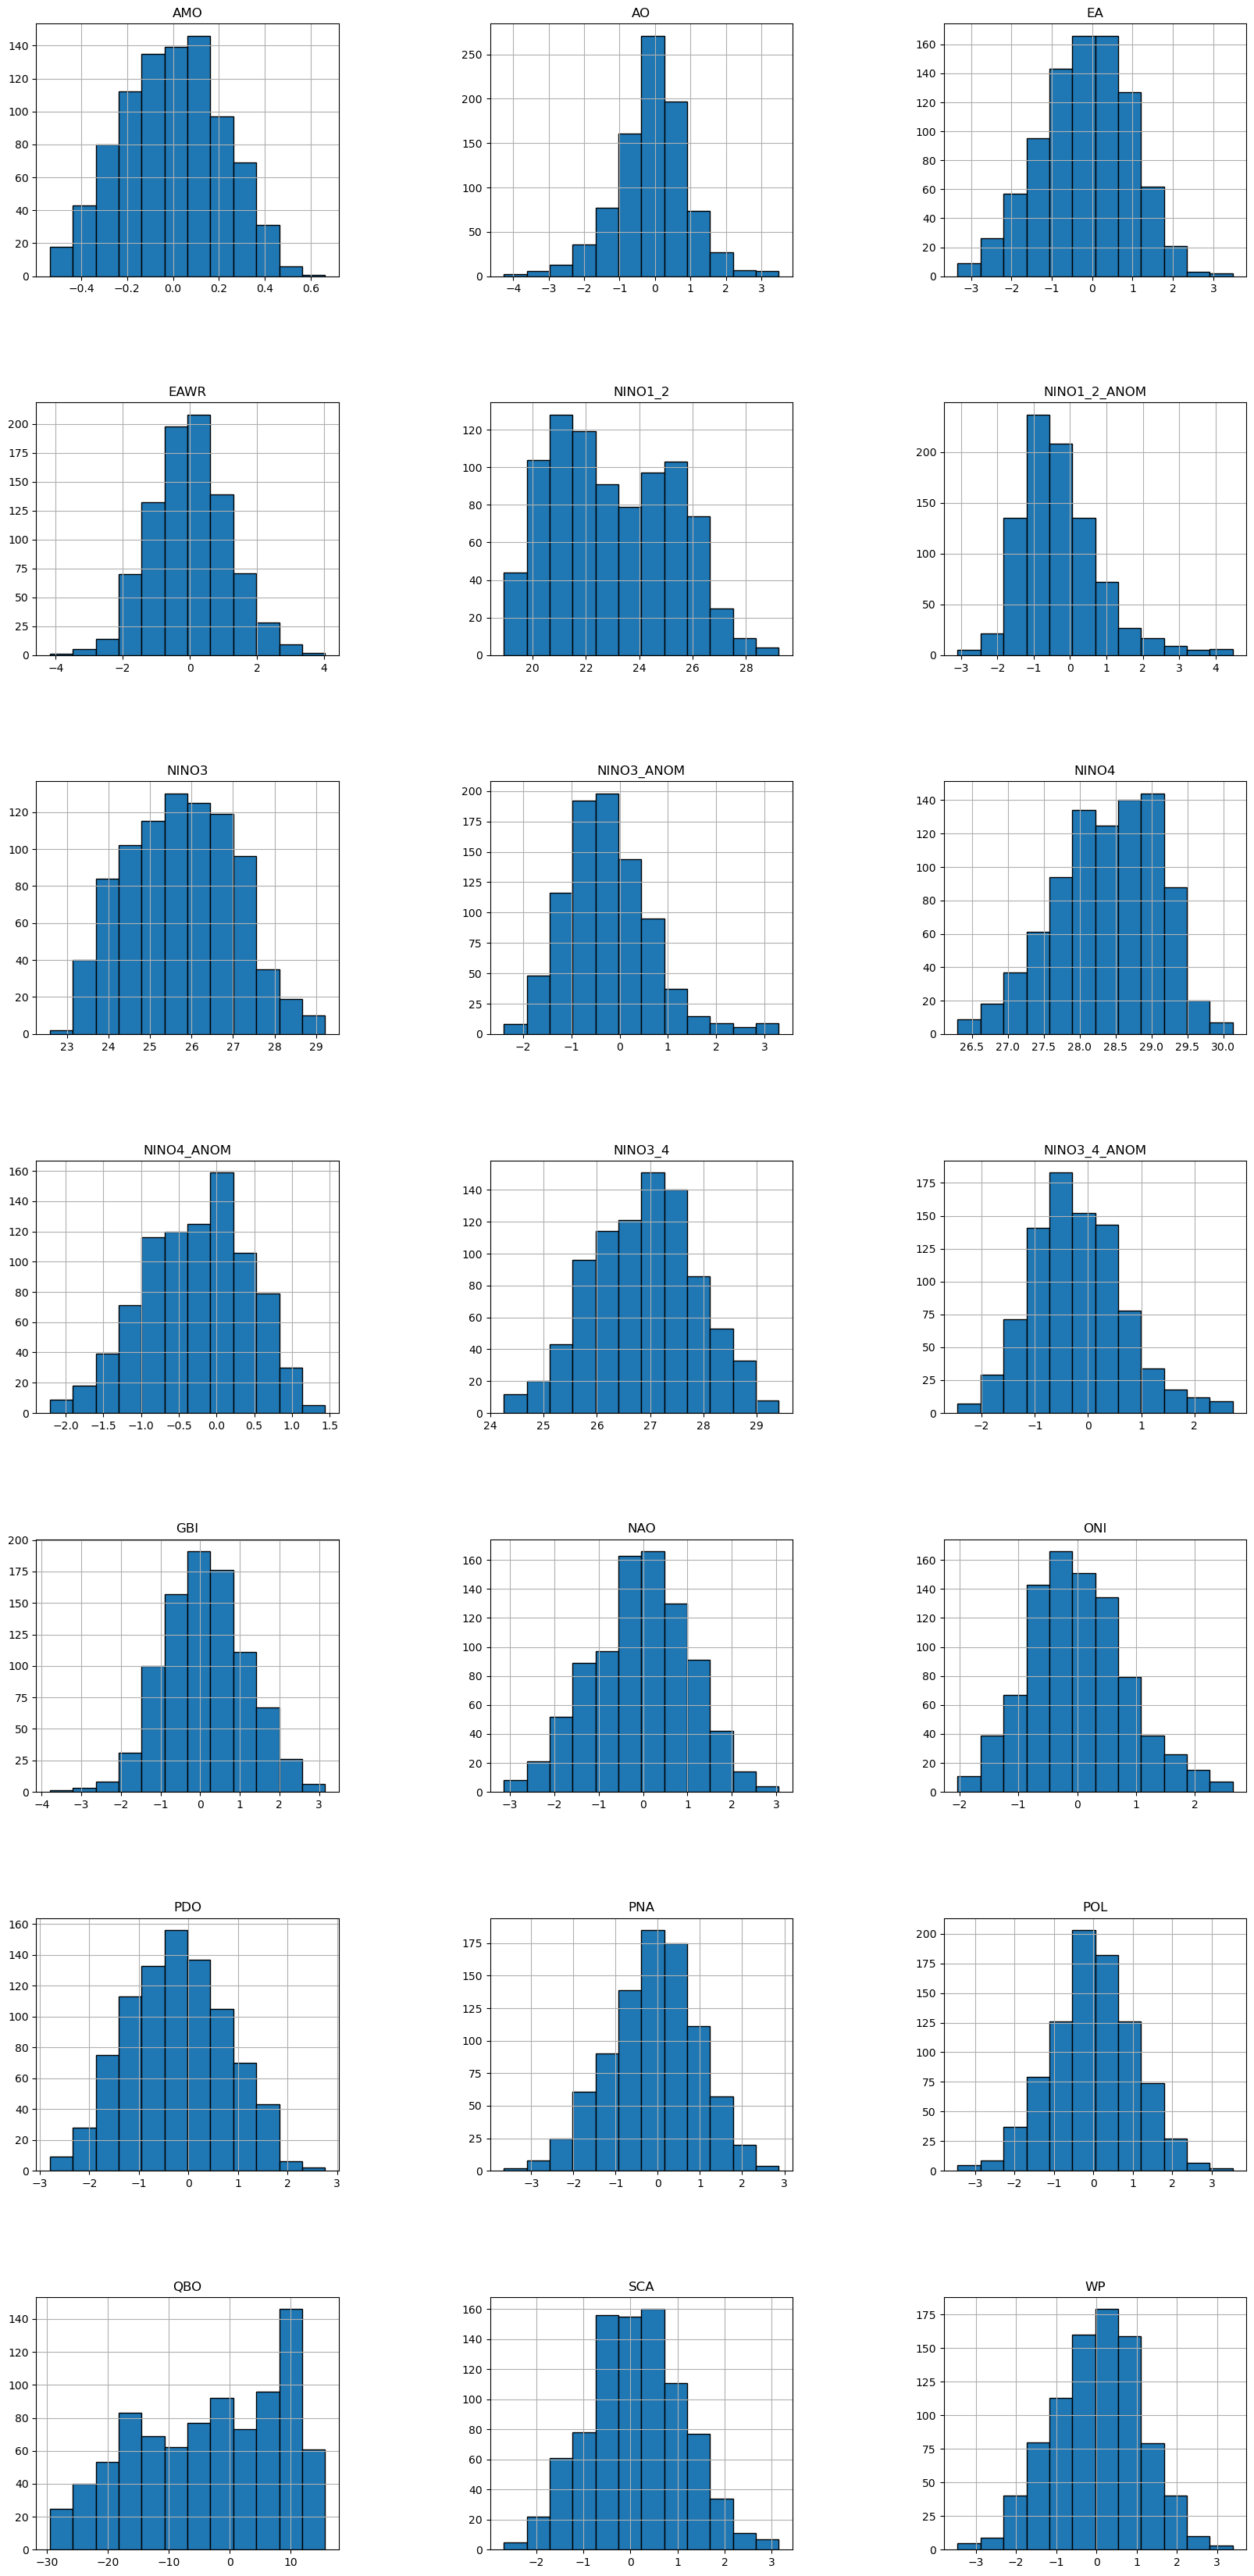

In [111]:
i = 0
fig, axes = plt.subplots(7, 3,figsize=(20, 42))
fig.subplots_adjust(hspace = .5, wspace=.5)
for ind in indices:
    row = i // 3
    col = i % 3
    df[ind].hist(edgecolor="black",bins=12,ax=axes[row, col])
    axes[row, col].set_title(ind)
    i = i + 1


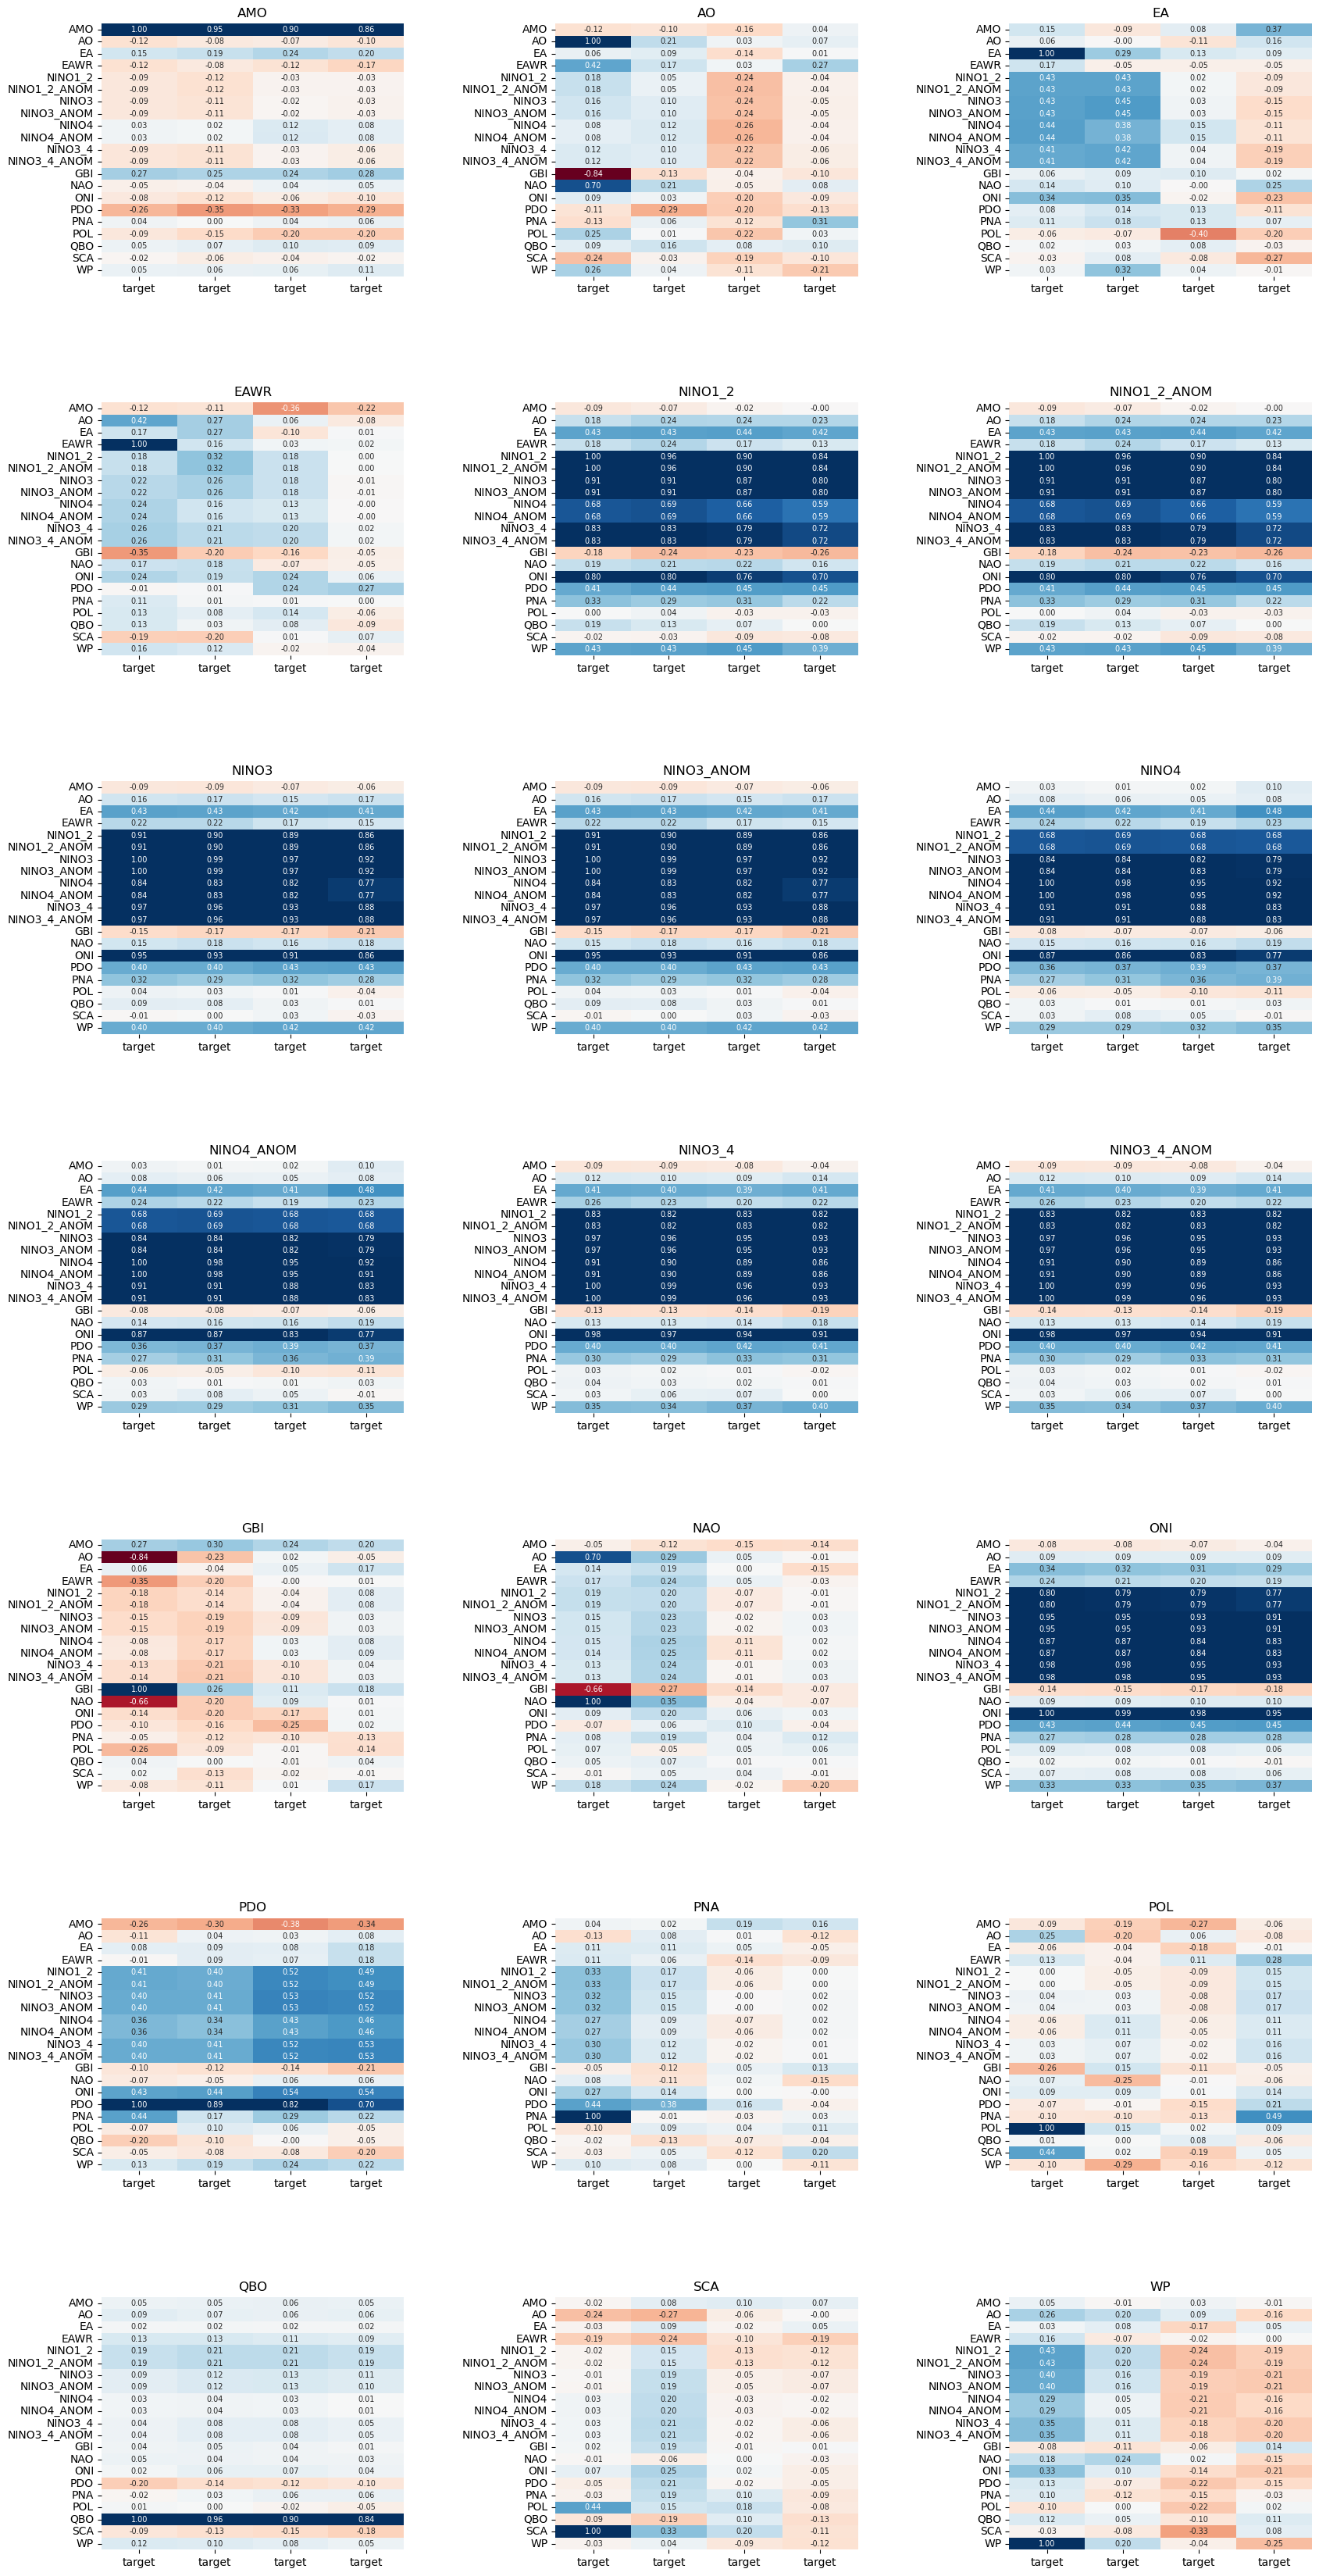

In [107]:
i = 0
fig, axes = plt.subplots(7, 3,figsize=(20, 42))
fig.subplots_adjust(hspace = .5, wspace=.5)
for ind in indices:
    temp = df[df["month"]==12]
    temp = temp.drop(columns=["year","month"])
    result = list()
    for lag in range(0,4):
        temp['target'] = df[ind].shift(lag)
        result.append(temp.corr()['target'])
        temp.drop("target",axis=1,inplace=True)

    corr_matrix = pd.DataFrame(result).T
    corr_matrix = corr_matrix.iloc[:-1]

    row = i // 3
    col = i % 3

    sns.heatmap(corr_matrix,
    vmax=0.8, vmin=-0.8,
    annot=True, fmt=".2f",annot_kws={'fontsize':7},ax=axes[row, col],cbar=False,
    #mask=mask,
    cmap="RdBu")
    axes[row, col].set_title(ind)
    i = i + 1


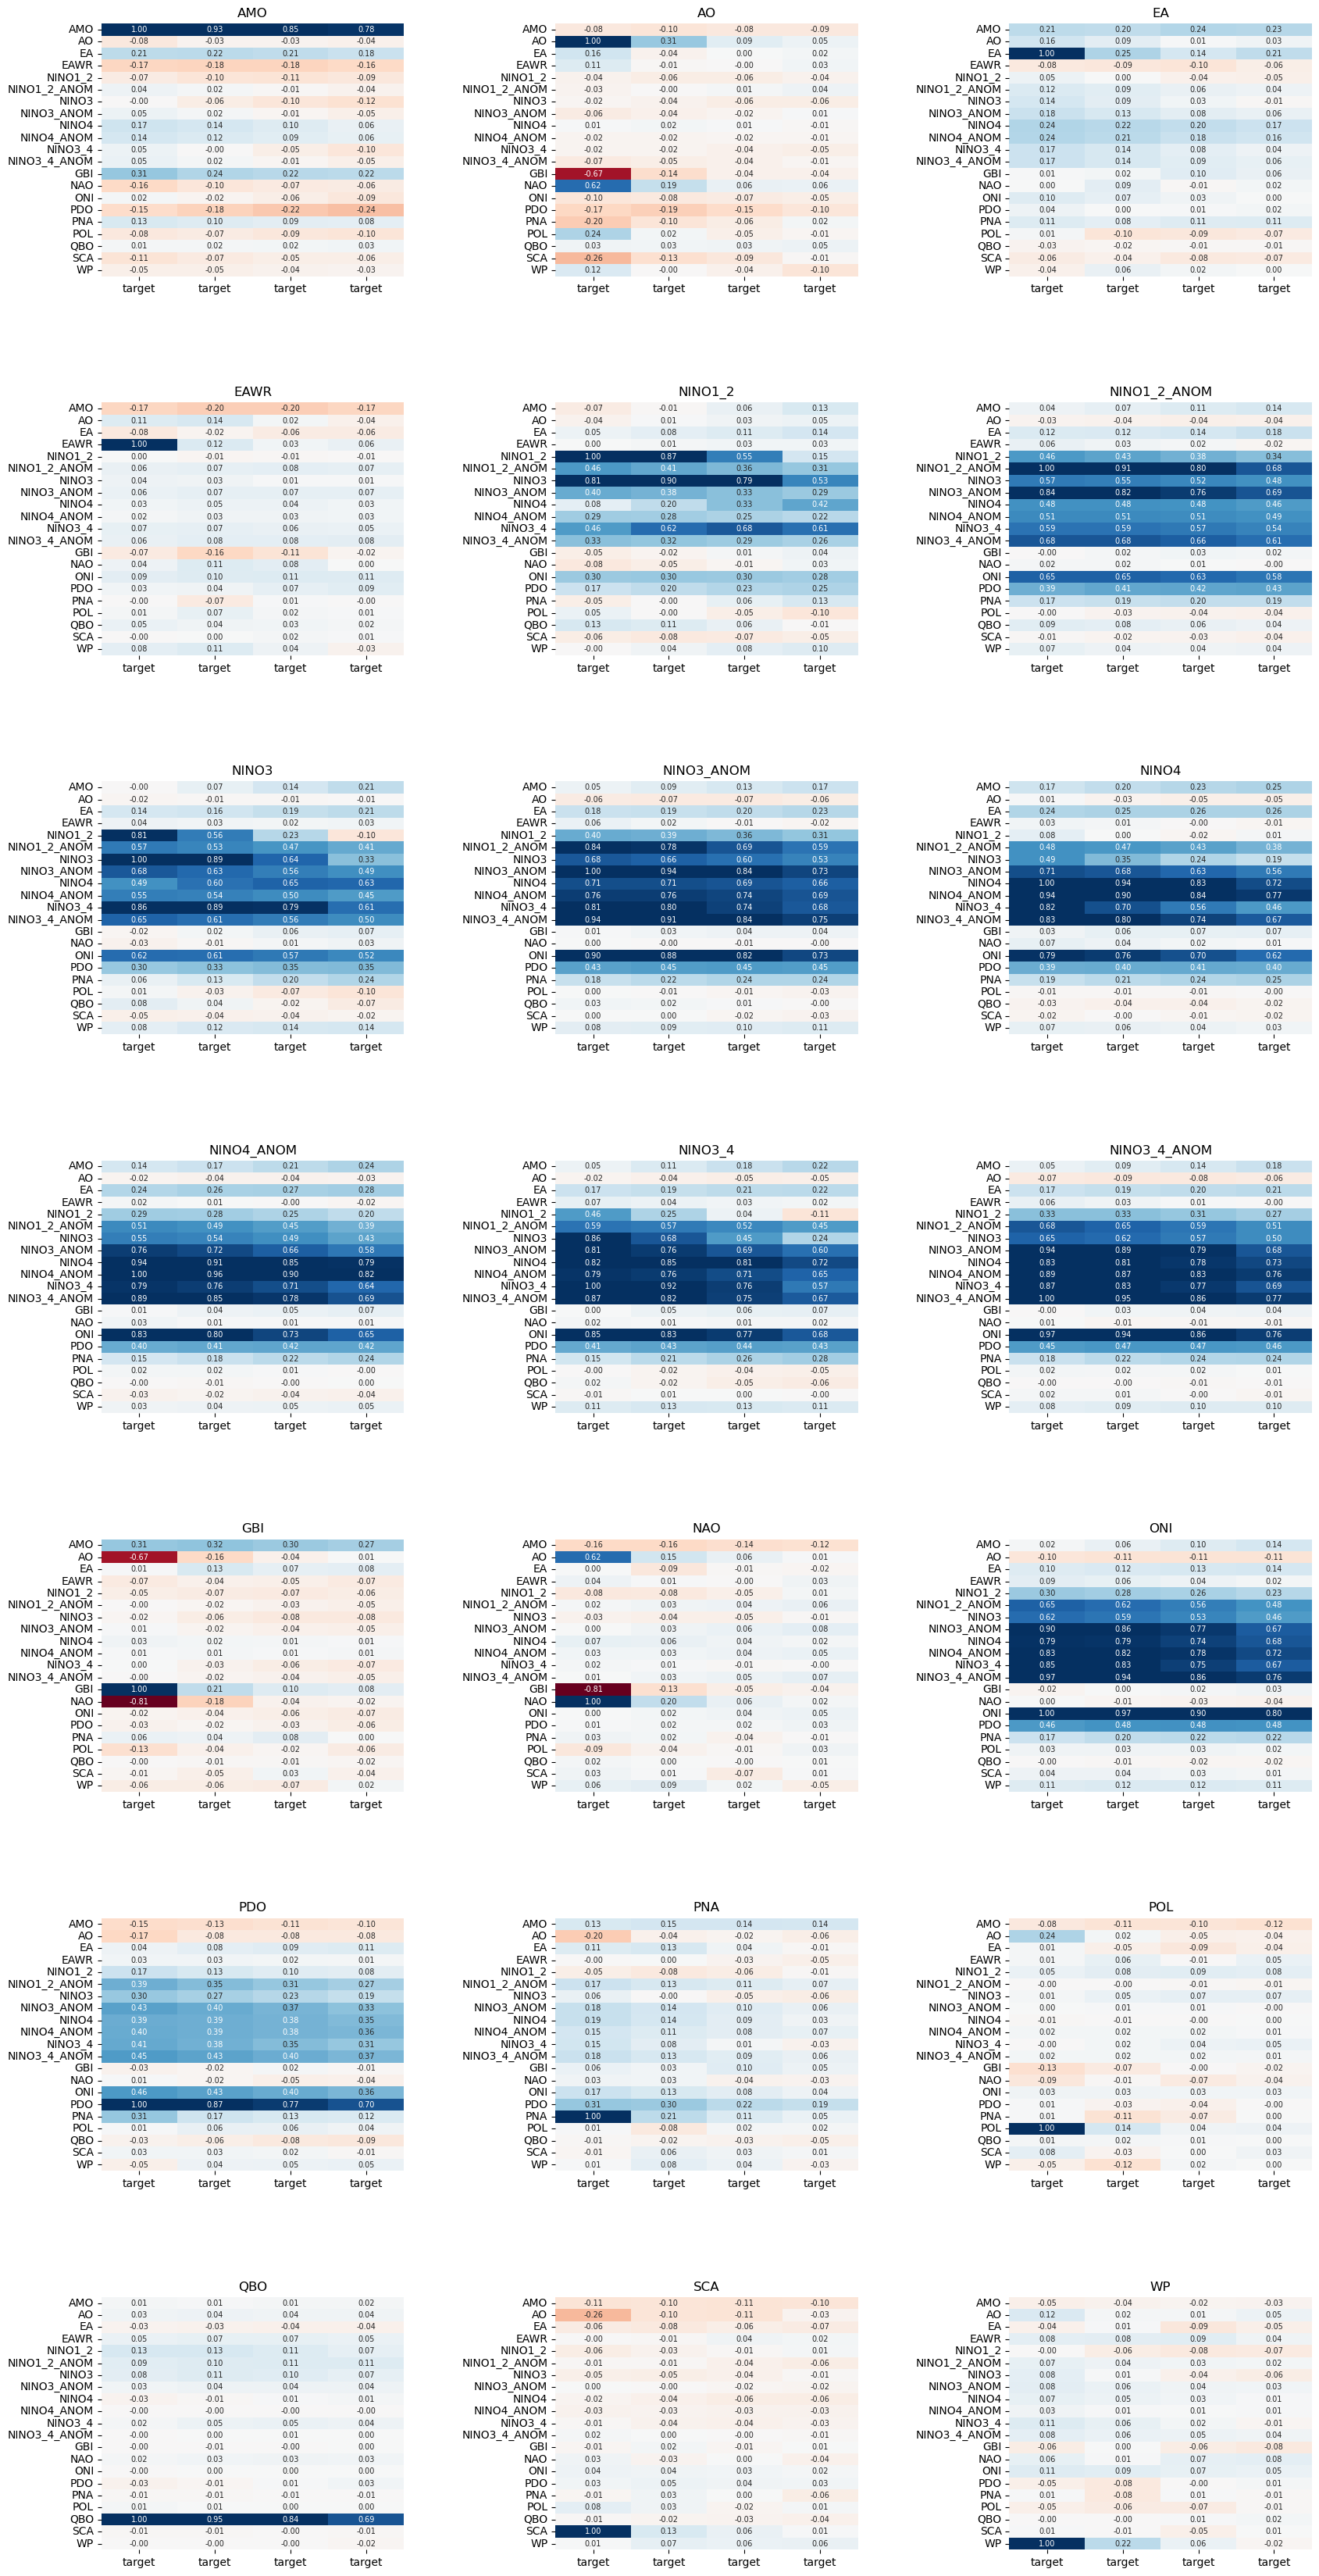

In [121]:
i = 0
fig, axes = plt.subplots(7, 3,figsize=(20, 42))
fig.subplots_adjust(hspace = .5, wspace=.5)
for ind in indices:
    #temp = df[df["month"]==12]
    temp = df.drop(columns=["year","month"])
    result = list()
    for lag in range(0,4):
        temp['target'] = df[ind].shift(lag)
        result.append(temp.corr()['target'])
        temp.drop("target",axis=1,inplace=True)

    corr_matrix = pd.DataFrame(result).T
    corr_matrix = corr_matrix.iloc[:-1]

    row = i // 3
    col = i % 3

    sns.heatmap(corr_matrix,
    vmax=0.8, vmin=-0.8,
    annot=True, fmt=".2f",annot_kws={'fontsize':7},ax=axes[row, col],cbar=False,
    #mask=mask,
    cmap="RdBu")
    axes[row, col].set_title(ind)
    i = i + 1

#### Snow Cover

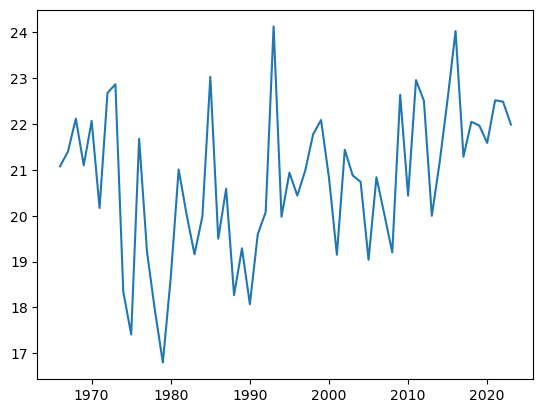

In [27]:
sn_cover=pd.read_csv(r'data/raw/snow_cover.csv',sep='\t',skipinitialspace=False,skiprows=0)
plt.plot(sn_cover[sn_cover['Month']==11]['Year'],sn_cover[sn_cover['Month']==11]['Eurasia'])

array([0.        , 0.00273224, 0.00546448, 0.00819672, 0.01092896,
       0.0136612 , 0.01639344, 0.01912568, 0.02185792, 0.02459016,
       0.0273224 , 0.03005464, 0.03278689, 0.03551913, 0.03825137,
       0.04098361, 0.04371585, 0.04644809, 0.04918033, 0.05191257,
       0.05464481, 0.05737705, 0.06010929, 0.06284153, 0.06557377,
       0.06830601, 0.07103825, 0.07377049, 0.07650273, 0.07923497,
       0.08196721, 0.08469945, 0.08743169, 0.09016393, 0.09289617,
       0.09562842, 0.09836066, 0.1010929 , 0.10382514, 0.10655738,
       0.10928962, 0.11202186, 0.1147541 , 0.11748634, 0.12021858,
       0.12295082, 0.12568306, 0.1284153 , 0.13114754, 0.13387978,
       0.13661202, 0.13934426, 0.1420765 , 0.14480874, 0.14754098,
       0.15027322, 0.15300546, 0.1557377 , 0.15846995, 0.16120219,
       0.16393443, 0.16666667, 0.16939891, 0.17213115, 0.17486339,
       0.17759563, 0.18032787, 0.18306011, 0.18579235, 0.18852459,
       0.19125683, 0.19398907, 0.19672131, 0.19945355, 0.20218

In [ ]:
x = np.array(list(range(0,367)))
xo = 100
df=pd.DataFrame()
df["original"] = x
df["padded"] = np.abs(x-xo)

,original,padded
0,0,100
1,1,99
2,2,98
3,3,97
4,4,96
...,...,...
362,362,262
363,363,263
364,364,264
365,365,265


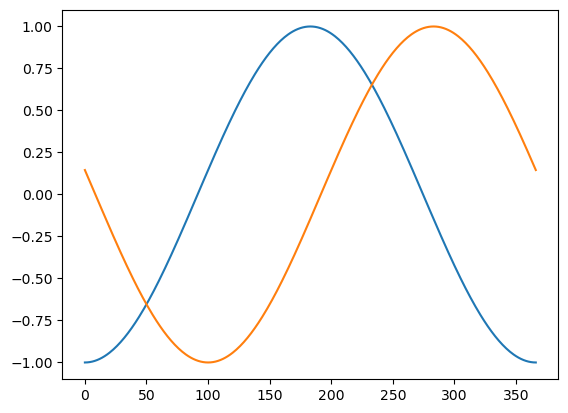

In [156]:
#days = range(0,367)/366
x = np.array(list(range(0,367)))

def season_sign(xo,x):
    xf = np.abs(x-xo)/366
    return -np.cos(2*np.pi*xf)



plt.plot(x,season_sign(0,x))
plt.plot(x,season_sign(100,x))